1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd
df = pd.read_csv("open_rank_20236.csv")
max_value = df['value'].max()
min_value = df['value'].min()
mean_value = df['value'].mean()
median_value = df['value'].median()
print(f"最大值: {max_value:.2f}")
print(f"最小值: {min_value:.2f}")
print(f"均值: {mean_value:.2f}")
print(f"中位数: {median_value:.2f}")

最大值: 1394.45
最小值: 200.68
均值: 346.97
中位数: 273.67


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [ ]:
import pandas as pd
df = pd.read_csv("activity_2022.csv")
col=df.columns.tolist()
for i in range(1,len(col)-1):
    for j in range(df.shape[0]):
        df.loc[j,col[i]]=(df.loc[j,col[i+1]]-df.loc[j,col[i]])/df.loc[j,col[i]]
df1=df.set_index('repo')
df2=df1.iloc[:,:-1].mean(axis=1)*100
print(df2)
    

repo
MicrosoftDocs/azure-docs                  -1.792781
NixOS/nixpkgs                              0.029453
dotnet/runtime                            -2.284829
elastic/kibana                            -0.365071
firstcontributions/first-contributions    14.082374
flutter/flutter                           -1.240426
home-assistant/core                        0.845268
microsoft/vscode                           2.290469
pytorch/pytorch                            1.316038
rust-lang/rust                            -0.377805
dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [30]:
import pandas as pd
chinad = pd.read_csv('china_2022.csv')
globald = pd.read_csv('global_2022.csv')
target = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull']
stats = {}
for tmp in target:
    stats[tmp] = {
        'China Mean': chinad[tmp].mean(),
        'Global Mean': globald[tmp].mean(),
        'China Max': chinad[tmp].max(),
        'Global Max': globald[tmp].max(),
        'China Min': chinad[tmp].min(),
        'Global Min': globald[tmp].min()
    }
df = pd.DataFrame(stats).T
print(df)

                China Mean  Global Mean  China Max  Global Max  China Min  \
issue_comment      61205.5     341409.4   167814.0   1437317.0    11741.0   
open_issue          9169.2      43300.2    22397.0    189185.0      752.0   
open_pull          16912.7      83423.0    35266.0    309685.0     1823.0   
review_comment     19857.5     120392.1    60402.0    456166.0     2113.0   
merged_pull        13764.1      62472.0    26732.0    257123.0     1165.0   

                Global Min  
issue_comment      78530.0  
open_issue         13162.0  
open_pull          27414.0  
review_comment     35072.0  
merged_pull        15418.0  


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [37]:
#A表示非软件，B表示带HTML标签
P_A = 0.25  # 非软件类占比
P_BA = 0.85  # 非软件类中带 HTML
P_BnA = 0.10  # 软件类中带 HTML
P_nA = 1 - P_A  # 软件类占比
P_AB = (P_BA * P_A) / ((P_BA * P_A) + (P_BnA * P_nA))
print(f"{P_AB:.2%}")

73.91%


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [38]:
# A是工具B是java
P_A = 0.50  # 工具
P_BA = 0.35  # 工具中 Java
P_BnA = 0.10  # 非工具中 Java
P_nA = 1 - P_A  # 非工具组
P_AB = (P_BA * P_A) / ((P_BA * P_A) + (P_BnA * P_nA))
print(f"{P_AB:.2%}")

77.78%


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

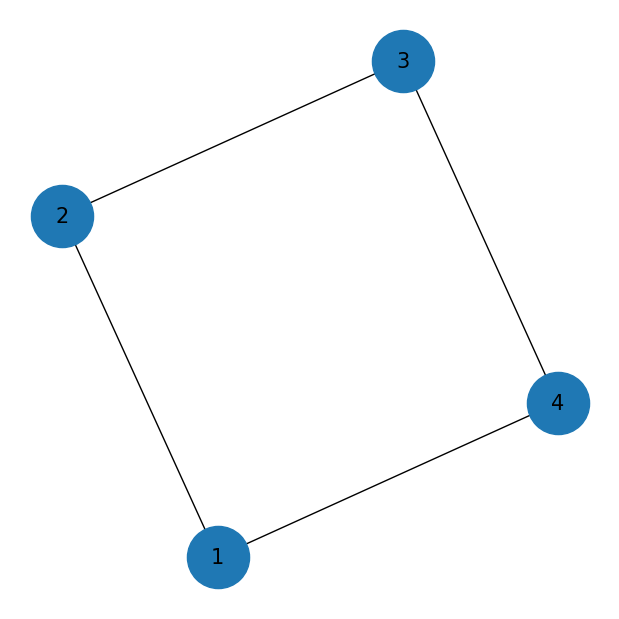

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
users = [1, 2, 3, 4]
G.add_nodes_from(users)
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]
G.add_edges_from(edges)
plt.figure(figsize=(6, 6))  
nx.draw(G,
        with_labels=True,
        node_size=2000,
        font_size=15)
plt.show()  

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

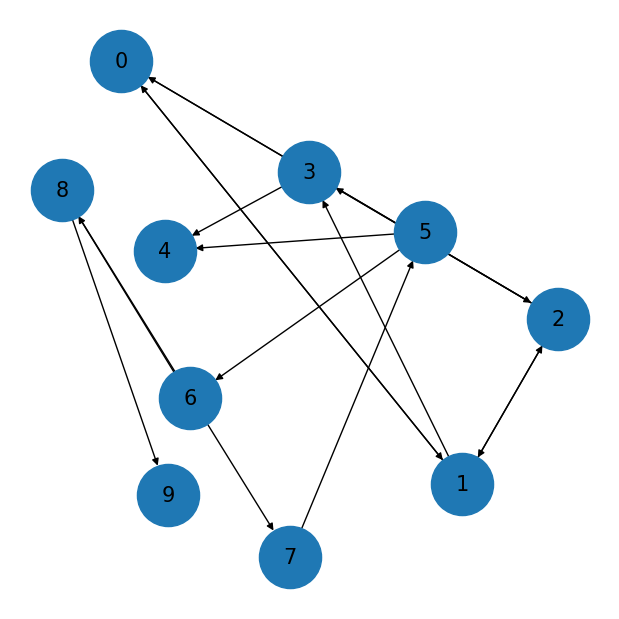

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)
pos = nx.spring_layout(G,k=3, iterations=5)
plt.figure(figsize=(6, 6))  
nx.draw(G,
        pos,
        with_labels=True,
        node_size=2000,
        font_size=15)
plt.show() 

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

0: PageRank = 0.095
1: PageRank = 0.105
2: PageRank = 0.105
3: PageRank = 0.095
4: PageRank = 0.159
5: PageRank = 0.102
6: PageRank = 0.079
7: PageRank = 0.079
8: PageRank = 0.102
9: PageRank = 0.079


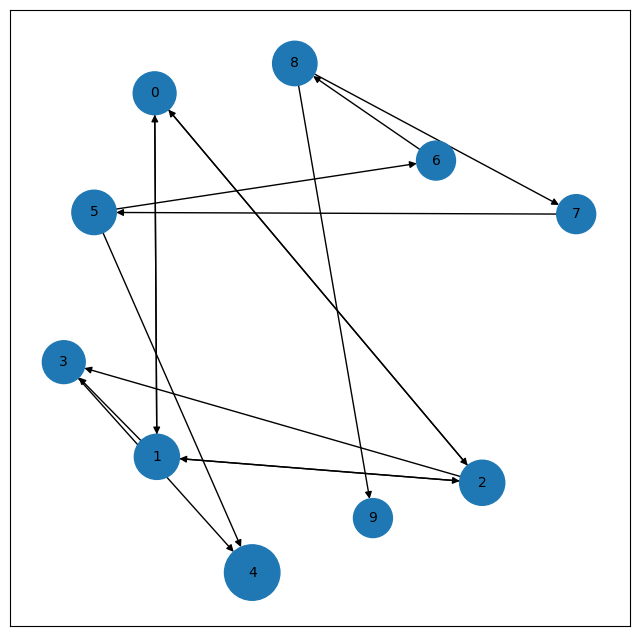

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)
pgr = nx.pagerank(G)
for node, pr in pgr.items():
    print(f"{node}: PageRank = {pr:.3f}")
plt.figure(figsize=(8, 8))
node_sizes = [v * 10000 for v in pgr.values()]
pos = nx.spring_layout(G,k=3, iterations=5)
nx.draw_networkx(G, 
                pos=pos,
                with_labels=True,
                node_size=node_sizes,
                font_size=10)
plt.show()